In [127]:
# imports
%matplotlib inline
import pandas
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sys

# figure size
plt.rcParams['figure.figsize'] = (15.0, 8.0)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

plt.rc('font', **font)

In [195]:
df = pandas.read_csv("grid_search_results.csv", index_col=False, header=0)
df

stream      gain  \
0                                          franka_2000  0.290067   
1                          asterisk_rtp_downstream_240  0.458644   
2     radio_miki_acks_66_no_options_0_ip_id_fix_wnd_sz  0.750593   
3    vlc_v6_mts_gsm_s16l_ts_rtp_2_fixed_pkt_size_1_... -0.003243   
4              Ekiga_test_rtp_only_downstream_filtered  0.227052   
5                                        easyIp_noPayl  0.940850   
6                                      easyIpv6_noPayl  0.973900   
7                                       easyUdp_noPayl  0.954536   
8                                     easyUdpv6_noPayl  0.978083   
9                                 easyRtpNoCsrc_noPayl  0.863450   
10                              easyRtpv6NoCsrc_noPayl  0.910250   
11                         hardRtpNoCsrc_noPayl_randTs  0.615675   
12                       hardRtpv6NoCsrc_noPayl_randTs  0.900917   
13                                         franka_2000  0.481849   
14                         asterisk_rtp_downstream_240  0.481511   
15    radio_miki_acks_66_no_options_0_ip_id_fix_wnd_sz  0.825791   
16   vlc_v6_mts_gsm_s16l_ts_rtp_2_fixed_pkt_size_1_... -0.003243   
17             Ekiga_test_rtp_only_downstream_filtered  0.227052   
18                                       easyIp_noPayl  0.940850   
19                                     easyIpv6_noPayl  0.973900   
20                                      easyUdp_noPayl  0.954536   
21                                    easyUdpv6_noPayl  0.978083   
22                                easyRtpNoCsrc_noPayl  0.863450   
23                              easyRtpv6NoCsrc_noPayl  0.910250   
24                         hardRtpNoCsrc_noPayl_randTs  0.616800   
25                       hardRtpv6NoCsrc_noPayl_randTs  0.892633   
26                                         franka_2000  0.579120   
27                         asterisk_rtp_downstream_240  0.492535   
28    radio_miki_acks_66_no_options_0_ip_id_fix_wnd_sz  0.845949   
29   vlc_v6_mts_gsm_s16l_ts_rtp_2_fixed_pkt_size_1_... -0.003243   
..                                                 ...       ...   
750                               easyRtpNoCsrc_noPayl  0.863450   
751                             easyRtpv6NoCsrc_noPayl  0.910250   
752                        hardRtpNoCsrc_noPayl_randTs  0.837575   
753                      hardRtpv6NoCsrc_noPayl_randTs  0.892633   
754                                        franka_2000  0.585817   
755                        asterisk_rtp_downstream_240  0.501857   
756   radio_miki_acks_66_no_options_0_ip_id_fix_wnd_sz  0.845949   
757  vlc_v6_mts_gsm_s16l_ts_rtp_2_fixed_pkt_size_1_...  0.159026   
758            Ekiga_test_rtp_only_downstream_filtered  0.221692   
759                                      easyIp_noPayl  0.940850   
760                                    easyIpv6_noPayl  0.973900   
761                                     easyUdp_noPayl  0.954536   
762                                   easyUdpv6_noPayl  0.978083   
763                               easyRtpNoCsrc_noPayl  0.863450   
764                             easyRtpv6NoCsrc_noPayl  0.910250   
765                        hardRtpNoCsrc_noPayl_randTs  0.837575   
766                      hardRtpv6NoCsrc_noPayl_randTs  0.892633   
767                                        franka_2000  0.601754   
768                        asterisk_rtp_downstream_240  0.487761   
769   radio_miki_acks_66_no_options_0_ip_id_fix_wnd_sz  0.845949   
770  vlc_v6_mts_gsm_s16l_ts_rtp_2_fixed_pkt_size_1_...  0.167405   
771            Ekiga_test_rtp_only_downstream_filtered  0.223126   
772                                      easyIp_noPayl  0.847850   
773                                    easyIpv6_noPayl  0.973900   
774                                     easyUdp_noPayl  0.890929   
775                                   easyUdpv6_noPayl  0.978083   
776                               easyRtpNoCsrc_noPayl  0.773025   
777                             easy

In [81]:
#g = df[df.stream=="hardRtpNoCsrc_noPayl_randTs"].groupby("clf")
#print(g['gain'].mean().to_frame(name='mean').reset_index())
#print(g.mean())
#g = df[df.stream=="hardRtpNoCsrc_noPayl_randTs"][df.clf==1]
#print(g.gain.mean())
#g = df[df.stream=="hardRtpNoCsrc_noPayl_randTs"][df.clf==2]
#print(g.gain.mean())

0.7193950000000001
0.7181200000000001


/home/mtomoskozi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/mtomoskozi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [86]:
for i in df[df.stream=="hardRtpNoCsrc_noPayl_randTs"].groupby("clf").gain.mean():
    print(i)
#pandas.DataFrame({'gain' : df[df.stream=="easyRtpNoCsrc_noPayl"].groupby("clf").gain})

0.7193950000000001
0.7181200000000001
0.72767
0.7909700000000001
0.8206100000000001
0.7733125000000001


In [99]:
g = df.groupby(["clf", "stream"]).mean().gain
g

clf  stream                                            
1    Ekiga_test_rtp_only_downstream_filtered               0.226190
     asterisk_rtp_downstream_240                           0.477045
     easyIp_noPayl                                         0.922250
     easyIpv6_noPayl                                       0.973900
     easyRtpNoCsrc_noPayl                                  0.845365
     easyRtpv6NoCsrc_noPayl                                0.904637
     easyUdp_noPayl                                        0.941814
     easyUdpv6_noPayl                                      0.978083
     franka_2000                                           0.511192
     hardRtpNoCsrc_noPayl_randTs                           0.719395
     hardRtpv6NoCsrc_noPayl_randTs                         0.888870
     radio_miki_acks_66_no_options_0_ip_id_fix_wnd_sz      0.821166
     vlc_v6_mts_gsm_s16l_ts_rtp_2_fixed_pkt_size_1_2000    0.065484
2    Ekiga_test_rtp_only_downstream_filtered               0

In [261]:
df = df.replace('franka_2000', 'Franka')
df = df.replace('asterisk_rtp_downstream_240', 'Asterisk')
df = df.replace('radio_miki_acks_66_no_options_0_ip_id_fix_wnd_sz', 'Radio')
df = df.replace('vlc_v6_mts_gsm_s16l_ts_rtp_2_fixed_pkt_size_1_2000', 'VLC')
df = df.replace('Ekiga_test_rtp_only_downstream_filtered', 'Ekiga')

df = df.replace('easyIp_noPayl', 'Easy IPv4')
df = df.replace('easyIpv6_noPayl', 'Easy IPv6')

df = df.replace('easyUdp_noPayl', 'Easy UDPv4')
df = df.replace('easyUdpv6_noPayl', 'Easy UDPv6')

df = df.replace('easyRtpNoCsrc_noPayl', 'Easy RTPv4')
df = df.replace('easyRtpv6NoCsrc_noPayl', 'Easy RTPv6')

df = df.replace('hardRtpNoCsrc_noPayl_randTs', 'Hard RTPv4')
df = df.replace('hardRtpv6NoCsrc_noPayl_randTs', 'Hard RTPv6')

df = df.replace(-1, 256)
df

stream      gain  conf_gain_low  conf_gain_high  uc_sz  co_sz  \
0        Franka  0.290067       0.270222        0.309912    269    190   
1      Asterisk  0.458644       0.449849        0.467439     96     51   
2         Radio  0.750593       0.708462        0.792724     40      9   
3           VLC -0.003243      -0.012495        0.006008    394    395   
4         Ekiga  0.227052       0.225376        0.228728    214    165   
5     Easy IPv4  0.940850       0.934120        0.947580     20      1   
6     Easy IPv6  0.973900       0.971741        0.976059     40      1   
7    Easy UDPv4  0.954536       0.947820        0.961252     28      1   
8    Easy UDPv6  0.978083       0.975957        0.980209     48      1   
9    Easy RTPv4  0.863450       0.856346        0.870554     40      5   
10   Easy RTPv6  0.910250       0.905136        0.915364     60      5   
11   Hard RTPv4  0.615675       0.586919        0.644431     40     15   
12   Hard RTPv6  0.900917       0.894682        0.907151     60      5   
13       Franka  0.481849       0.464804        0.498893    269    139   
14     Asterisk  0.481511       0.474816        0.488207     96     49   
15        Radio  0.825791       0.798077        0.853504     40      6   
16          VLC -0.003243      -0.012495        0.006008    394    395   
17        Ekiga  0.227052       0.225376        0.228728    214    165   
18    Easy IPv4  0.940850       0.934120        0.947580     20      1   
19    Easy IPv6  0.973900       0.971741        0.976059     40      1   
20   Easy UDPv4  0.954536       0.947820        0.961252     28      1   
21   Easy UDPv6  0.978083       0.975957        0.980209     48      1   
22   Easy RTPv4  0.863450       0.856346        0.870554     40      5   
23   Easy RTPv6  0.910250       0.905136        0.915364     60      5   
24   Hard RTPv4  0.616800       0.588090        0.645510     40     15   
25   Hard RTPv6  0.892633       0.887198        0.898068     60      6   
26       Franka  0.579120       0.566101        0.592140    269    113   
27     Asterisk  0.492535       0.487225        0.497846     96     48   
28        Radio  0.845949       0.837970        0.853928     40      6   
29          VLC -0.003243      -0.012495        0.006008    394    395   
..          ...       ...            ...             ...    ...    ...   
750  Easy RTPv4  0.863450       0.856346        0.870554     40      5   
751  Easy RTPv6  0.910250       0.905136        0.915364     60      5   
752  Hard RTPv4  0.837575       0.830290        0.844860     40      6   
753  Hard RTPv6  0.892633       0.887198        0.898068     60      6   
754      Franka  0.585817       0.575328        0.596306    269    111   
755    Asterisk  0.501857       0.498164        0.505550     96     47   
756       Radio  0.845949       0.837970        0.853928     40      6   
757         VLC  0.159026       0.156696        0.161355    394    331   
758       Ekiga  0.221692       0.218455        0.224929    214    166   
759   Easy IPv4  0.940850       0.934120        0.947580     20      1   
760   Easy IPv6  0.973900       0.971741        0.976059     40      1   
761  Easy UDPv4  0.954536       0.947820        0.961252     28      1   
762  Easy UDPv6  0.978083       0.975957        0.980209     48      1   
763  Easy RTPv4  0.863450       0.856346        0.870554     40      5   
764  Easy RTPv6  0.910250       0.905136        0.915364     60      5   
765  Hard RTPv4  0.837575       0.830290        0.844860     40      6   
766  Hard RTPv6  0.892633       0.887198        0.898068     60      6   
767      Franka  0.601754       0.600999        0.602510    269    107   
768    Asterisk  0.487761       0.486155        0.489368     96     49   
769       Radio  0.845949       0.837970        0.853928     40      6   
770         VLC  0.167405       0.167193        0.167616    394    328   
771       Ekiga  0.223126       0.221847        0.224406    214    166   
772   Easy IP

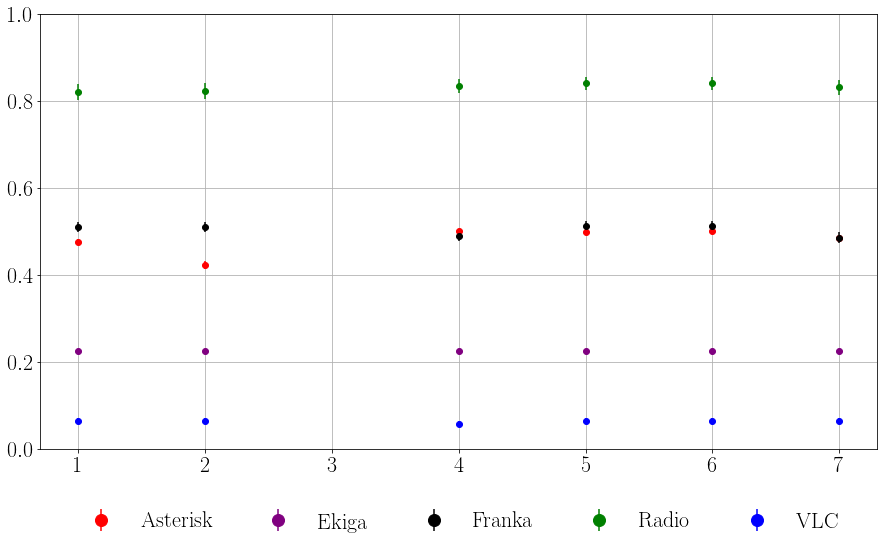

In [247]:
fig, ax = plt.subplots()
plt.grid()
plt.ylim([0.0,1.0])
#plt.xlim([0,1.0])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

colours = {'Franka':'black', 'Asterisk':'red', 'Radio':'green', 'VLC':'blue', 'Ekiga':'purple'}
models = {1:'Log. Regr.', 2:'LinSVC', 3:'SVC', 4:'DTree', 5:'RForest', 6:'Bayes', 7:'KNN'}

for name, group in df.groupby("stream"):
    if name in ['Franka', 'Asterisk', 'Radio', 'VLC', 'Ekiga']:
        for n, g in group.groupby("clf"):
            ax.errorbar(n, g.gain.mean(), yerr=[[g.gain.mean()-g.conf_gain_low.mean()], [g.conf_gain_high.mean()-g.gain.mean()]],
                        marker='.', linestyle='', ms=12, label=name if n == 1 else '', color=colours[name])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), frameon=False, fontsize=22,
          fancybox=False, shadow=False, ncol=5, markerscale=2, numpoints=1)

#plt.show()

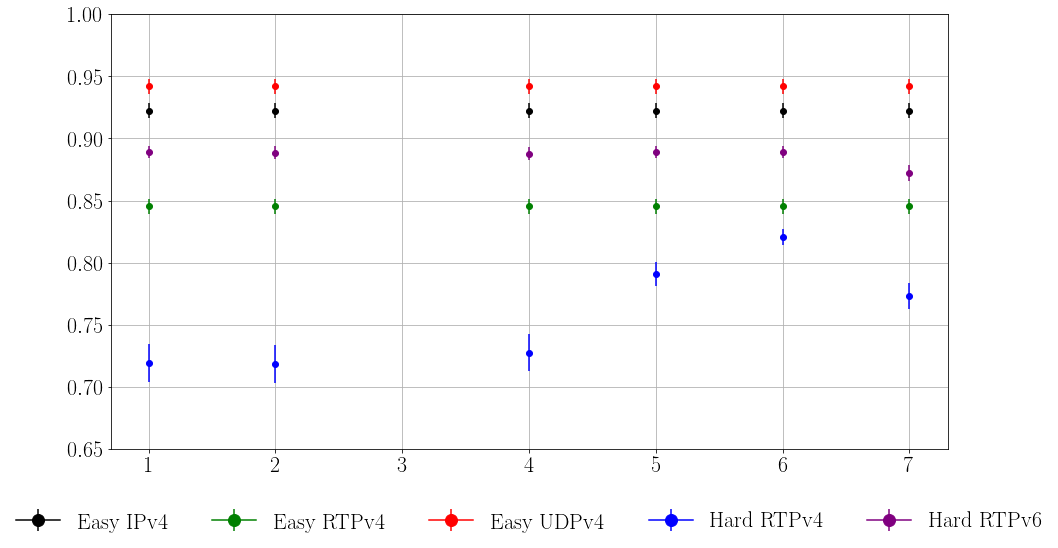

In [240]:
fig, ax = plt.subplots()
plt.grid()
plt.ylim([0.65,1.0])
#plt.xlim([0,1.0])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


colours = {'Easy IPv4':'black', 'Easy UDPv4':'red', 'Easy RTPv4':'green', 'Hard RTPv4':'blue', 'Hard RTPv6':'purple'}
models = {1:'Log. Regr.', 2:'LinSVC', 3:'SVC', 4:'DTree', 5:'RForest', 6:'Bayes', 7:'KNN'}

for name, group in df.groupby("stream"):
    if name in ['Easy IPv4', 'Easy UDPv4', 'Easy RTPv4', 'Hard RTPv4', 'Hard RTPv6']:
        for n, g in group.groupby("clf"):
            #print([g.conf_gain_low.mean()])
            #g.conf_gain_low.mean()
            #[g.conf_gain_low.mean(), g.conf_gain_high.mean()]
            ax.errorbar(n, g.gain.mean(), yerr=[[g.gain.mean()-g.conf_gain_low.mean()], [g.conf_gain_high.mean()-g.gain.mean()]],
                marker='.', linestyle='-', ms=12, label=name if n == 1 else '', color=colours[name])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), frameon=False, fontsize=22,
          fancybox=False, shadow=False, ncol=5, markerscale=2, numpoints=1)

#plt.show()

/home/mtomoskozi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=16.0, right=16.0
  'left=%s, right=%s') % (left, right))


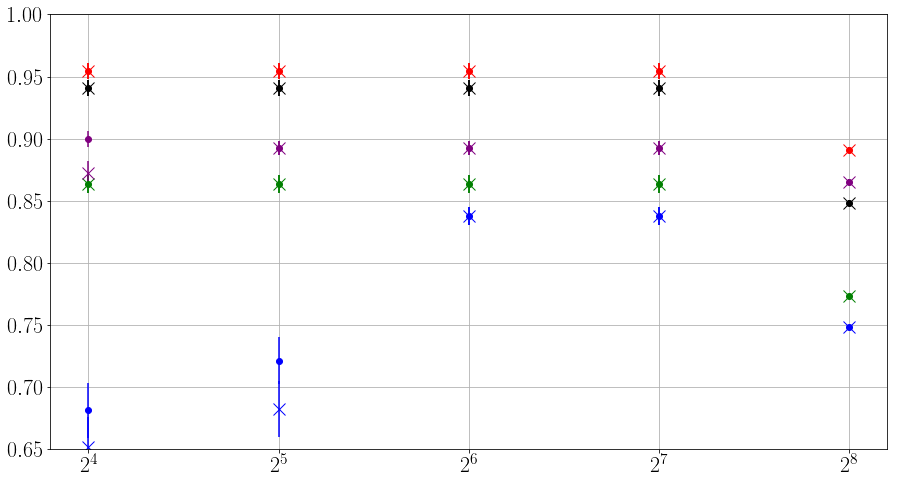

In [279]:
fig, ax = plt.subplots()
plt.grid()
plt.ylim([0.65,1.0])
#plt.xlim([0,1.0])
ax.set_xscale('log', basex=2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


colours = {'Easy IPv4':'black', 'Easy UDPv4':'red', 'Easy RTPv4':'green', 'Hard RTPv4':'blue', 'Hard RTPv6':'purple'}
models = {1:'Log. Regr.', 2:'LinSVC', 3:'SVC', 4:'DTree', 5:'RForest', 6:'Bayes', 7:'KNN'}

for name, group in df.groupby("stream"):
    if name in ['Easy IPv4', 'Easy UDPv4', 'Easy RTPv4', 'Hard RTPv4', 'Hard RTPv6']:
        for n, g in group.groupby("oversampling"):
            for n2, g2 in g.groupby("samples"):
                #print([g.conf_gain_low.mean()])
                #g.conf_gain_low.mean()
                #[g.conf_gain_low.mean(), g.conf_gain_high.mean()]
                ax.errorbar(n2, g2.gain.mean(), yerr=[[g2.gain.mean()-g2.conf_gain_low.mean()], [g2.conf_gain_high.mean()-g2.gain.mean()]],
                        marker='.' if n==False else 'x', linestyle='-', ms=12, label=name if n == 16 else '', color=colours[name])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), frameon=False, fontsize=22,
          fancybox=False, shadow=False, ncol=5, markerscale=2, numpoints=1)

#plt.show()

/home/mtomoskozi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=16.0, right=16.0
  'left=%s, right=%s') % (left, right))


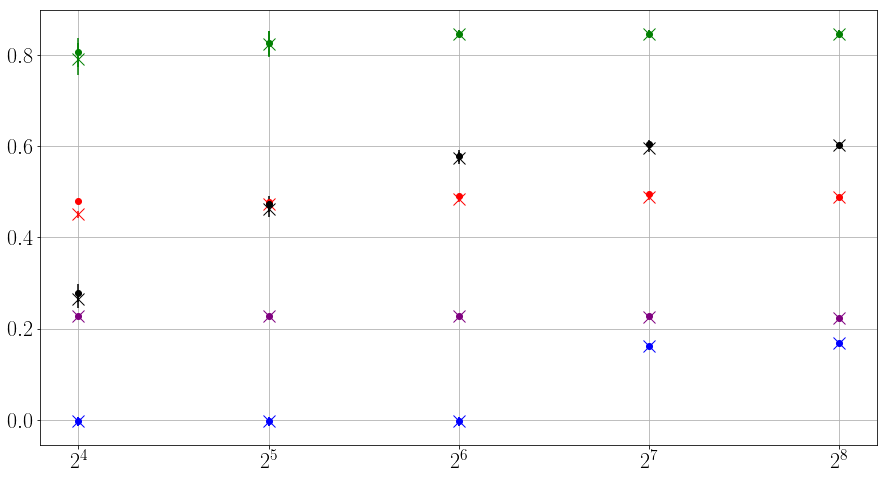

In [278]:
fig, ax = plt.subplots()
plt.grid()
#plt.ylim([0.65,1.0])
#plt.xlim([0,1.0])
ax.set_xscale('log', basex=2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


colours = {'Franka':'black', 'Asterisk':'red', 'Radio':'green', 'VLC':'blue', 'Ekiga':'purple'}
models = {1:'Log. Regr.', 2:'LinSVC', 3:'SVC', 4:'DTree', 5:'RForest', 6:'Bayes', 7:'KNN'}

for name, group in df.groupby("stream"):
    if name in ['Franka', 'Asterisk', 'Radio', 'VLC', 'Ekiga']:
        for n, g in group.groupby("oversampling"):
            for n2, g2 in g.groupby("samples"):
                #print([g.conf_gain_low.mean()])
                #g.conf_gain_low.mean()
                #[g.conf_gain_low.mean(), g.conf_gain_high.mean()]
                ax.errorbar(n2, g2.gain.mean(), yerr=[[g2.gain.mean()-g2.conf_gain_low.mean()], [g2.conf_gain_high.mean()-g2.gain.mean()]],
                        marker='.' if n==False else 'x', linestyle='-', ms=12, label=name if n == 16 else '', color=colours[name])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), frameon=False, fontsize=22,
          fancybox=False, shadow=False, ncol=5, markerscale=2, numpoints=1)

#plt.show()

/home/mtomoskozi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=16.0, right=16.0
  'left=%s, right=%s') % (left, right))


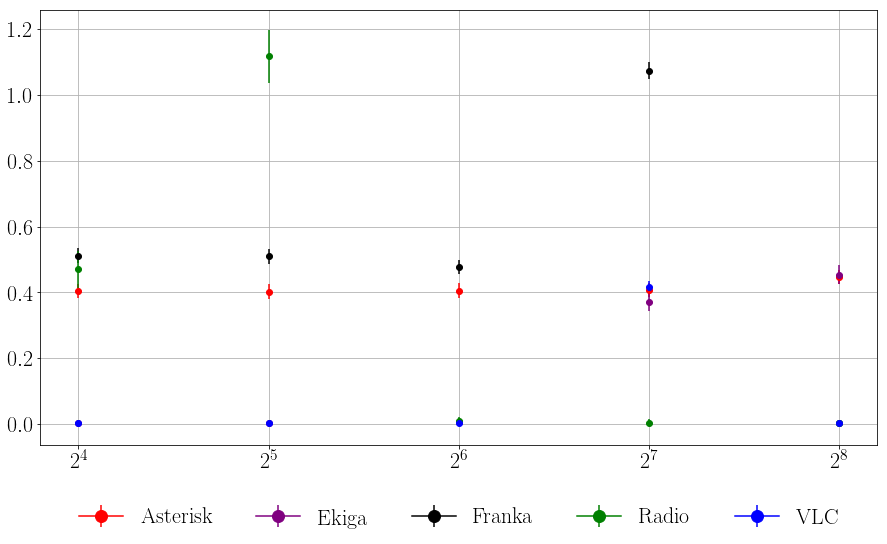

In [275]:
fig, ax = plt.subplots()
plt.grid()
#plt.ylim([0.65,1.0])
#plt.xlim([0,1.0])
ax.set_xscale('log', basex=2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


colours = {'Franka':'black', 'Asterisk':'red', 'Radio':'green', 'VLC':'blue', 'Ekiga':'purple'}
models = {1:'Log. Regr.', 2:'LinSVC', 3:'SVC', 4:'DTree', 5:'RForest', 6:'Bayes', 7:'KNN'}

for name, group in df.groupby("stream"):
    if name in ['Franka', 'Asterisk', 'Radio', 'VLC', 'Ekiga']:
        for n, g in group.groupby("samples"):
            #print([g.conf_gain_low.mean()])
            #g.conf_gain_low.mean()
            #[g.conf_gain_low.mean(), g.conf_gain_high.mean()]
            ax.errorbar(n, g.dt_pred.mean(), yerr=[[g.dt_pred.mean()-g.conf_dt_pred_low.mean()], [g.conf_dt_pred_high.mean()-g.dt_pred.mean()]],
                        marker='.', linestyle='-', ms=12, label=name if n == 16 else '', color=colours[name])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), frameon=False, fontsize=22,
          fancybox=False, shadow=False, ncol=5, markerscale=2, numpoints=1)

#plt.show()

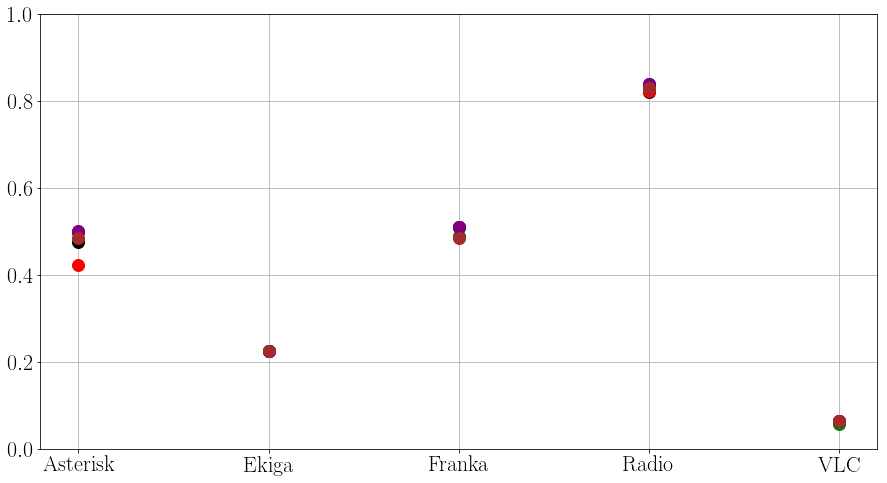

In [188]:
fig, ax = plt.subplots()
plt.grid()
plt.ylim([0.0,1.0])
#plt.xlim([0,1.0])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

colours = {1:'black', 2:'red', 4:'green', 5:'blue', 6:'purple', 7:'brown'}
#models = {1:'Log. Regr.', 2:'LinSVC', 3:'SVC', 4:'DTree', 5:'RForest', 6:'Bayes', 7:'KNN'}

for name, group in df.groupby("clf"):
    for n, g in group.groupby("stream"):
        if n in ['Franka', 'Asterisk', 'Radio', 'VLC', 'Ekiga']:
            ax.plot(n, g.gain.mean(), marker='o', linestyle='', ms=12, color=colours[name]) #, label=n if name == 1 else '')
http://localhost:8888/tree
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), frameon=False, fontsize=22,
          fancybox=False, shadow=False, ncol=5, markerscale=2, numpoints=1)

#plt.show()

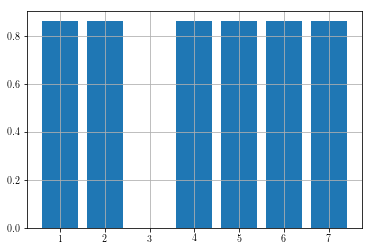

In [21]:
fig, ax = plt.subplots()
plt.grid()
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.ylim([-1.0,1.0])
#plt.xlim([0,1.0])
#plt.xlabel("Loss Rate", fontsize=22)
#plt.ylabel("Utility", fontsize=22)

ax.bar(df[df.stream=="easyRtpNoCsrc_noPayl"].clf, df[df.stream=="easyRtpNoCsrc_noPayl"].gain)
#ax.plot(df.gain, df.stream, linestyle='', ms=7, label='IPv4, IR Periodicity 10', color='red', linewidth=5, marker='s')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), frameon=False, fontsize=22,
          fancybox=False, shadow=False, ncol=2, markerscale=2, numpoints=1)
#plt.savefig('test.eps', bbox_inches='tight')
#plt.savefig('test.pdf', bbox_inches='tight')